# CPD using TIRE

In [3]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import backend as K
# from tensorflow.keras.layers import Lambda, Input, Dense
# from tensorflow.keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences


import utils
import TIRE
from importlib import reload 

# experiments 
# import experiments.replication as x
# import experiments.each_dimensions as x
# import experiments.each_dimensions_ICA as x
# import experiments.ICA_L2 as x 
import experiments.eeg_each_dimensions as x


## Set parameters

In [2]:
# ipynb, mỗi lần đổi code, phải restart kernal để load lại toàn bộ. Import thì chỉ lấy từ cache, ko lấy được code mới. Lý do

In [4]:
workflow = x.Experiment()
workflow.set_hyperparameter_type('alpha')
workflow.hyperparams.experiment_name

'eeg_each_dimensions'

## Generate data

In [5]:
timeseries, timeseries_len, windows_TD, windows_FD = workflow.get_timeseries()

breakpoints = workflow.get_breakpoint(timeseries_len)

timeseries shape: (3, 119496)


In [6]:
len(breakpoints)

119297

## Train the autoencoders

In [7]:
shared_features_TD, shared_features_FD = workflow.train_autoencoder(windows_TD, windows_FD)


train AE for channel: 0
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 100)]     0           []                               
                                                                                                  
 dense (Dense)                  (None, 3, 1)         101         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 3, 0)         0           ['input_1[0][0]']                
                                                                                                  
 tf.concat (TFOpLambda)         (None, 3, 1)         0           ['dense[0][0]',                  
                                                                  'den

KeyboardInterrupt: 

## Postprocessing and peak detection

In [6]:
# post process for TD, FD and both, then save to file 
workflow.dissimilarities_post_process(shared_features_TD, shared_features_FD)

mode: TD
peaks length: 310
number elements > 0: 310
[0.4177545118337087]


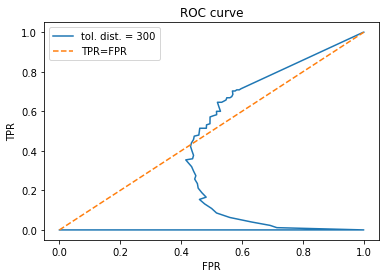

mode: FD
peaks length: 297
number elements > 0: 297
[0.3929763254349716]


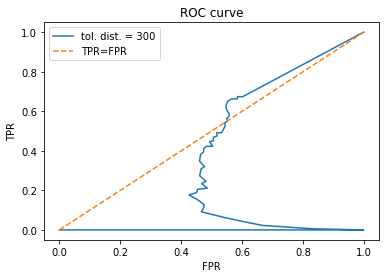

mode: both
peaks length: 287
number elements > 0: 287
[0.4354515827817383]


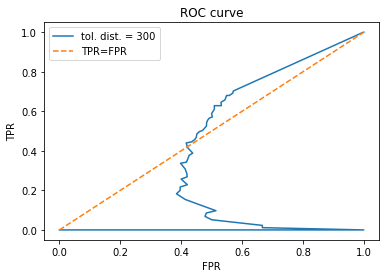

In [7]:
workflow.get_auc(breakpoints)

mode: TD


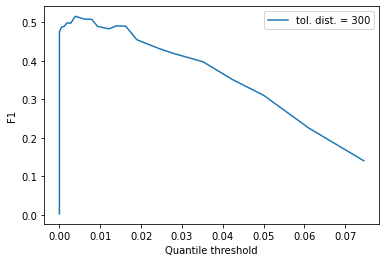

f1 max: [0.5152671755725191]
mode: FD


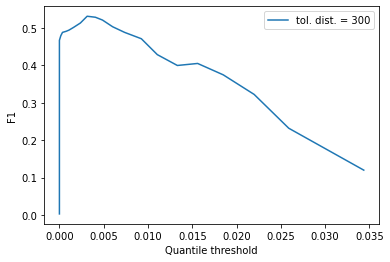

f1 max: [0.5316973415132924]
mode: both


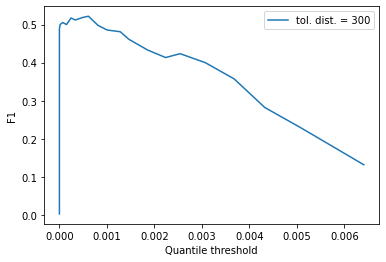

f1 max: [0.5217391304347826]


In [8]:
reload(utils)
f1s = workflow.get_f1(breakpoints)

In [1]:
from tensorflow.python.client import device_lib

In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13965493578128561909
xla_global_id: -1
]


In [8]:
import tensorflow as tf 
print(tf.__version__)

2.9.0
